In [1]:
# import packeges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.axislines import SubplotZero
from matplotlib import pylab
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.pyplot import text
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  """


# Temperture

In [2]:
df_add = pd.read_csv("/content/drive/MyDrive/Greenwall/temperture_rh_data/Temperature/lab_temp-data-as-seriestocolumns-2022-07-04 15_58_33.csv")
df_add['Time'] = pd.to_datetime(df_add['Time'])
df_add = df_add.set_index('Time')
df_add

,1_ac_north,4_lab_center,5_greenwal_middle_incideCanopy,6_vaisala_calibration,7_closet_west,8_ac_south,9_OutsideCanopyProfile_2,10_david_office_door,11_closet_north,12_OutsideCanopyProfile_1,13_OutsideCanopyProfile_3,14_OutsideCanopyProfile_4
Time,,,,,,,,,,,,
2022-02-16 13:55:00,NaN,23.8,21.8,23.5,23.7,23.9,23.5,23.3,23.5,24.2,NaN,NaN
2022-02-16 14:00:00,23.9,23.6,21.8,23.5,23.7,23.8,23.4,23.2,23.5,24.0,22.9,22.1
2022-02-16 14:05:00,23.8,NaN,21.8,23.5,NaN,NaN,NaN,23.3,23.5,NaN,23.0,22.1
2022-02-16 14:10:00,NaN,23.5,21.7,23.6,23.7,23.8,23.5,23.3,23.4,24.1,NaN,NaN
2022-02-16 14:15:00,23.8,23.6,21.8,23.6,23.7,23.8,23.6,23.3,23.5,24.1,23.1,22.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-04 15:35:00,25.2,24.8,NaN,26.2,24.2,23.3,NaN,25.1,24.6,NaN,NaN,24.4
2022-07-04 15:40:00,25.2,24.9,NaN,26.1,NaN,23.3,24.1,25.1,24.6,24.0,NaN,24.4
2022-07-04 15:45:00,25.3,24.8,NaN,26.2,24.3,NaN,24.1,25.1,24.6,23.9,NaN,NaN


In [3]:
# creat df for temperture:
file_path = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Temperature/lab_temp-data-25052021_25052022.csv'
df_temp = pd.read_csv(file_path) # reading the raw date (xlsx)

# make 'Time' the dataframe index
df_temp['Time'] = pd.to_datetime(df_temp['Time'])
df_temp = df_temp.set_index('Time')
# df_temp = df_temp.fillna(method='ffill')  # Completion of the missing values according to the previous value
# df_temp = df_temp.interpolate()
df_all = pd.concat([df_temp,df_add.loc[df_temp.index[-1]:]])
df_hourly_all = df_all.resample('H').mean()
df_center = df_hourly_all[['6_vaisala_calibration','4_lab_center','10_david_office_door']]
df_hourly_all['Avg_center'] = df_center.mean(axis=1)
# iteractive plot for caculte Ca of Amax:
pd.options.plotting.backend = "plotly"

fig = df_hourly_all.plot(title="$CO_2$ inside and outside", template="simple_white")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Seasonal Profile



## Winter
13 days


interpolation

In [4]:
start_winter = "2022-01-20 00:00:00"
end_winter = '2022-02-28 00:00:00'
df_winter1 =df_temp.loc[start_winter:end_winter]
start_winter = "2022-01-04 00:00:00"
end_winter = '2022-01-15 00:00:00'
df_winter2 =df_temp.loc[start_winter:end_winter]
df_winter = pd.concat([df_winter2,df_winter1])
df_winter.plot()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [ ]:
df_temp.interpolate().plot()

we do not have missing data so we can interpolate the data

In [ ]:
# # resample the data into average hourly data
df_hourly_temp = df_temp.interpolate().resample('H').mean()
# # df_hourly_temp.describe()

In [ ]:
by_time = df_hourly_temp.groupby(df_hourly_temp.index.time).mean()
by_time_std = df_hourly_temp.groupby(df_hourly_temp.index.time).std()
time = np.arange(0,24,1)
time

In [ ]:
# Graph to poster
# palette =["#22577a", "#38a3a5", "#57cc99", "#80ed99", "#80ed99", "#c7f9cc","black"]
palette =["#5fad56", "#f2c14e", "#57cc99", "#f78154", "#226f54", "#b4436c","black"]
lw = 3
sns.set_palette(palette=palette)
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(13,7))
# plots
ax.fill_between(time, by_time['1_ac_north'] + by_time_std['1_ac_north'], 
                by_time['1_ac_north']-by_time_std['1_ac_north'], alpha=.1)
ax.plot(time, by_time['1_ac_north'], label="Ac-7.2(m)",lw=lw)
ax.fill_between(time, by_time['4_lab_center'] + by_time_std['4_lab_center'],
                by_time['4_lab_center']-by_time_std['4_lab_center'], alpha=.1)
ax.plot(time,by_time['4_lab_center'], label="3.8(m)",lw=lw)
ax.fill_between(time, by_time['5_greenwal_middle_incideCanopy'] + by_time_std['5_greenwal_middle_incideCanopy'],
                by_time['5_greenwal_middle_incideCanopy']-by_time_std['5_greenwal_middle_incideCanopy'], alpha=.1)
ax.plot(time,by_time['5_greenwal_middle_incideCanopy'], label="In canopy-0 (m)",lw=lw)
ax.fill_between(time, by_time['14_OutsideCanopyProfile_4'] + by_time_std['14_OutsideCanopyProfile_4'],
                by_time['14_OutsideCanopyProfile_4']-by_time_std['14_OutsideCanopyProfile_4'], alpha=.1)
ax.plot(time,by_time['14_OutsideCanopyProfile_4'], label="Outside Canopy-10 (cm)",lw=lw)
ax.fill_between(time, by_time['6_vaisala_calibration'] + by_time_std['6_vaisala_calibration'], by_time['6_vaisala_calibration']-by_time_std['6_vaisala_calibration'], alpha=.1)
ax.plot(time,by_time['6_vaisala_calibration'], label="2.5(m)",lw=lw)


# vertical line:
plt.axvline(x = 7, color = 'black',ls='-.', label = 'Light on')
plt.axvline(x = 23, color = 'black',ls='-.', )
# axes labels and figure title
ax.set_xlabel('Hour over the day')
ax.set_ylabel('Average temperature (°C)')
ax.set_title('Winter')

# some ticks adjustments
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

# legend
ax.legend(loc='upper left',fontsize = 15)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Profiles/" + 'winter_profile.png',bbox_inches = "tight")

## Autumn

No missing data - we can interpolate it.

Total days = 81

In [ ]:
start_autumn = "2021-09-01 00:00:00"
end_autumn = '2021-11-20 00:00:00'
end_autumn = '2021-09-30 00:00:00'
df_autumn =df_hourly_all.loc[start_autumn:end_autumn]
df_autumn.plot()

In [ ]:
df_autumn.interpolate().plot()

In [ ]:
# resample the data into average hourly data
df_autumn_plot = df_autumn.interpolate().resample('H').mean()
by_time = df_autumn_plot.groupby(df_autumn_plot.index.time).mean()
by_time_std = df_autumn_plot.groupby(df_autumn_plot.index.time).std()
time = np.arange(0,24,1)


# Graph
# palette =["#22577a", "#38a3a5", "#57cc99", "#80ed99", "#80ed99", "#c7f9cc","black"]
palette =["#5fad56", "#f2c14e", "#57cc99", "#f78154", "#226f54", "#b4436c","black"]
lw = 3
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(13,7))
# plots
ax.fill_between(time, by_time['1_ac_north'] + by_time_std['1_ac_north'], 
                by_time['1_ac_north']-by_time_std['1_ac_north'], alpha=.1)
ax.plot(time, by_time['1_ac_north'], label="Ac-7.2(m)",lw=lw)
ax.fill_between(time, by_time['4_lab_center'] + by_time_std['4_lab_center'],
                by_time['4_lab_center']-by_time_std['4_lab_center'], alpha=.1)
ax.plot(time,by_time['4_lab_center'], label="3.8(m)",lw=lw)
ax.fill_between(time, by_time['5_greenwal_middle_incideCanopy'] + by_time_std['5_greenwal_middle_incideCanopy'],
                by_time['5_greenwal_middle_incideCanopy']-by_time_std['5_greenwal_middle_incideCanopy'], alpha=.1)
ax.plot(time,by_time['5_greenwal_middle_incideCanopy'], label="In canopy-0 (m)",lw=lw)
ax.fill_between(time, by_time['14_OutsideCanopyProfile_4'] + by_time_std['14_OutsideCanopyProfile_4'],
                by_time['14_OutsideCanopyProfile_4']-by_time_std['14_OutsideCanopyProfile_4'], alpha=.1)
ax.plot(time,by_time['14_OutsideCanopyProfile_4'], label="Outside Canopy-10 (cm)",lw=lw)
ax.fill_between(time, by_time['6_vaisala_calibration'] + by_time_std['6_vaisala_calibration'], by_time['6_vaisala_calibration']-by_time_std['6_vaisala_calibration'], alpha=.1)
ax.plot(time,by_time['6_vaisala_calibration'], label="2.5(m)",lw=lw)


# vertical line:
plt.axvline(x = 7, color = 'black',ls='-.', label = 'Light on')
plt.axvline(x = 23, color = 'black',ls='-.', )
# axes labels and figure title
ax.set_xlabel('Hour over the day')
ax.set_ylabel('Average temperature (°C)')
ax.set_title('Autumn')

# some ticks adjustments
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

# legend
ax.legend(loc='upper left',fontsize = 15)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Profiles/" + 'Autumn_profile.png',bbox_inches = "tight")

## Spring

In [ ]:
start_spring = "2022-05-01 00:00:00"
end_spring = '2022-05-31 23:59:00'
df_spring =df_hourly_all.loc[start_spring:end_spring]
df_spring.plot()

In [ ]:
# resample the data into average hourly data
df_spring_plot = df_spring.resample('H').mean()
by_time = df_spring_plot.groupby(df_spring_plot.index.time).mean()
by_time_std = df_spring_plot.groupby(df_spring_plot.index.time).std()
time = np.arange(0,24,1)


# Graph
# palette =["#22577a", "#38a3a5", "#57cc99", "#80ed99", "#80ed99", "#c7f9cc","black"]
palette =["#5fad56", "#f2c14e", "#57cc99", "#f78154", "#226f54", "#b4436c","black"]
lw = 3
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(13,7))
# plots
ax.fill_between(time, by_time['1_ac_north'] + by_time_std['1_ac_north'], 
                by_time['1_ac_north']-by_time_std['1_ac_north'], alpha=.1)
ax.plot(time, by_time['1_ac_north'], label="Ac-7.2(m)",lw=lw)
ax.fill_between(time, by_time['4_lab_center'] + by_time_std['4_lab_center'],
                by_time['4_lab_center']-by_time_std['4_lab_center'], alpha=.1)
ax.plot(time,by_time['4_lab_center'], label="3.8(m)",lw=lw)
ax.fill_between(time, by_time['5_greenwal_middle_incideCanopy'] + by_time_std['5_greenwal_middle_incideCanopy'],
                by_time['5_greenwal_middle_incideCanopy']-by_time_std['5_greenwal_middle_incideCanopy'], alpha=.1)
ax.plot(time,by_time['5_greenwal_middle_incideCanopy'], label="In canopy-0 (m)",lw=lw)
ax.fill_between(time, by_time['14_OutsideCanopyProfile_4'] + by_time_std['14_OutsideCanopyProfile_4'],
                by_time['14_OutsideCanopyProfile_4']-by_time_std['14_OutsideCanopyProfile_4'], alpha=.1)
ax.plot(time,by_time['14_OutsideCanopyProfile_4'], label="Outside Canopy-10 (cm)",lw=lw)
ax.fill_between(time, by_time['6_vaisala_calibration'] + by_time_std['6_vaisala_calibration'], by_time['6_vaisala_calibration']-by_time_std['6_vaisala_calibration'], alpha=.1)
ax.plot(time,by_time['6_vaisala_calibration'], label="2.5(m)",lw=lw)


# vertical line:
plt.axvline(x = 7, color = 'black',ls='-.', label = 'Light on')
plt.axvline(x = 23, color = 'black',ls='-.', )
# axes labels and figure title
ax.set_xlabel('Hour over the day')
ax.set_ylabel('Average temperature (°C)')
ax.set_title('Spring')

# some ticks adjustments
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

# legend
ax.legend(loc='upper left',fontsize = 15)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Profiles/" + 'Spring_profile.png',bbox_inches = "tight")

## Summer
34 days. We have missing data so we cant interpolate.

In [ ]:
start_summer = "2022-06-01 00:00:00"
end_summer = '2022-07-30 00:00:00'
df_summer =df_hourly_all.loc[start_summer:end_summer]
df_summer.plot()

In [ ]:
# resample the data into average hourly data
df_summer_plot = df_summer.resample('H').mean()
by_time = df_summer_plot.groupby(df_summer_plot.index.time).mean()
by_time_std = df_summer_plot.groupby(df_summer_plot.index.time).std()
time = np.arange(0,24,1)


# Graph
# palette =["#22577a", "#38a3a5", "#57cc99", "#80ed99", "#80ed99", "#c7f9cc","black"]
palette =["#5fad56", "#f2c14e", "#57cc99", "#f78154", "#226f54", "#b4436c","black"]
lw = 3
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(13,7))
# plots
ax.fill_between(time, by_time['1_ac_north'] + by_time_std['1_ac_north'], 
                by_time['1_ac_north']-by_time_std['1_ac_north'], alpha=.1)
ax.plot(time, by_time['1_ac_north'], label="Ac-7.2(m)",lw=lw)
ax.fill_between(time, by_time['4_lab_center'] + by_time_std['4_lab_center'],
                by_time['4_lab_center']-by_time_std['4_lab_center'], alpha=.1)
ax.plot(time,by_time['4_lab_center'], label="3.8(m)",lw=lw)
ax.fill_between(time, by_time['5_greenwal_middle_incideCanopy'] + by_time_std['5_greenwal_middle_incideCanopy'],
                by_time['5_greenwal_middle_incideCanopy']-by_time_std['5_greenwal_middle_incideCanopy'], alpha=.1)
ax.plot(time,by_time['5_greenwal_middle_incideCanopy'], label="In canopy-0 (m)",lw=lw)
ax.fill_between(time, by_time['14_OutsideCanopyProfile_4'] + by_time_std['14_OutsideCanopyProfile_4'],
                by_time['14_OutsideCanopyProfile_4']-by_time_std['14_OutsideCanopyProfile_4'], alpha=.1)
ax.plot(time,by_time['14_OutsideCanopyProfile_4'], label="Outside Canopy-10 (cm)",lw=lw)
ax.fill_between(time, by_time['6_vaisala_calibration'] + by_time_std['6_vaisala_calibration'], by_time['6_vaisala_calibration']-by_time_std['6_vaisala_calibration'], alpha=.1)
ax.plot(time,by_time['6_vaisala_calibration'], label="2.5(m)",lw=lw)


# vertical line:
plt.axvline(x = 7, color = 'black',ls='-.', label = 'Light on')
plt.axvline(x = 23, color = 'black',ls='-.', )
# axes labels and figure title
ax.set_xlabel('Hour over the day')
ax.set_ylabel('Average temperature (°C)')
ax.set_title('Summer')

# some ticks adjustments
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

# legend
ax.legend(loc='upper left',fontsize = 15)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Profiles/" + 'Summer_profile.png',bbox_inches = "tight")

# Air circulation effect

### **Air circ off**

In [16]:
df_clean = pd.concat([df_autumn,df_winter,df_spring,df_summer])
df_ac_off = df_clean.loc["2022-03-01 00:04:00":"2022-05-16 00:10:00"]
df_ac_off.plot()

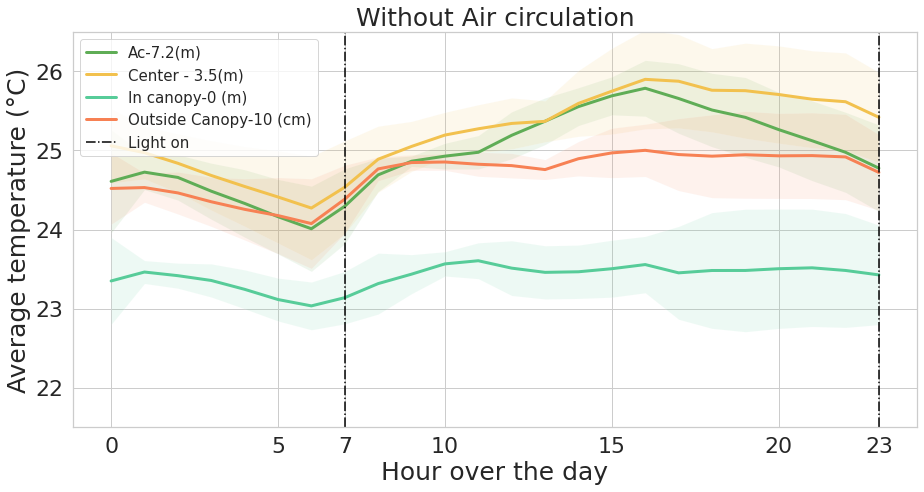

In [17]:
# resample the data into average hourly data
by_time = df_ac_off.groupby(df_ac_off.index.time).mean()
by_time_std = df_ac_off.groupby(df_ac_off.index.time).std()
time = np.arange(0,24,1)


# Graph
# palette =["#22577a", "#38a3a5", "#57cc99", "#80ed99", "#80ed99", "#c7f9cc","black"]
palette =["#5fad56", "#f2c14e", "#57cc99", "#f78154", "#226f54", "#b4436c","black"]
sns.set(style= "whitegrid",palette=palette)
lw = 3
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(13,7))
# plots
ax.fill_between(time, by_time['1_ac_north'] + by_time_std['1_ac_north'], 
                by_time['1_ac_north']-by_time_std['1_ac_north'], alpha=.1)
ax.plot(time, by_time['1_ac_north'], label="Ac-7.2(m)",lw=lw)
ax.fill_between(time, by_time['Avg_center'] + by_time_std['Avg_center'],
                by_time['Avg_center']-by_time_std['Avg_center'], alpha=.1)
ax.plot(time,by_time['Avg_center'], label="Center - 3.5(m)",lw=lw)
ax.fill_between(time, by_time['5_greenwal_middle_incideCanopy'] + by_time_std['5_greenwal_middle_incideCanopy'],
                by_time['5_greenwal_middle_incideCanopy']-by_time_std['5_greenwal_middle_incideCanopy'], alpha=.1)
ax.plot(time,by_time['5_greenwal_middle_incideCanopy'], label="In canopy-0 (m)",lw=lw)
ax.fill_between(time, by_time['14_OutsideCanopyProfile_4'] + by_time_std['14_OutsideCanopyProfile_4'],
                by_time['14_OutsideCanopyProfile_4']-by_time_std['14_OutsideCanopyProfile_4'], alpha=.1)
ax.plot(time,by_time['14_OutsideCanopyProfile_4'], label="Outside Canopy-10 (cm)",lw=lw)


# vertical line:
plt.axvline(x = 7, color = 'black',ls='-.', label = 'Light on')
plt.axvline(x = 23, color = 'black',ls='-.', )
# axes labels and figure title
ax.set_xlabel('Hour over the day',fontsize = 25)
ax.set_ylabel('Average temperature (°C)',fontsize = 25)
ax.set_title('Without Air circulation',fontsize = 25)
ax.set_ylim(21.5,26.5)
# some ticks adjustments
ax.set_xticks([0,5,7,10,15,20,23])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# legend
ax.legend(loc='upper left',fontsize = 15)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Profiles/" + 'No_AC_Temp_prfile.png',bbox_inches = "tight")

In [18]:
df_acoff_day = pd.DataFrame(index=df_ac_off.index)
for column in df_ac_off.columns:
  df_acoff_day[column] = df_ac_off[column] - df_ac_off['1_ac_north']
df_acoff_day.plot()

In [19]:
df_difff = by_time_std[['1_ac_north','Avg_center','5_greenwal_middle_incideCanopy','14_OutsideCanopyProfile_4']]
(df_difff['Avg_center']-df_difff['5_greenwal_middle_incideCanopy'])

00:00:00   -0.079834
01:00:00    0.186029
02:00:00    0.211125
03:00:00    0.228508
04:00:00    0.257115
05:00:00    0.311061
06:00:00    0.352352
07:00:00    0.254233
08:00:00    0.032688
09:00:00    0.069824
10:00:00    0.134117
11:00:00    0.077574
12:00:00   -0.023374
13:00:00   -0.076826
14:00:00    0.079008
15:00:00    0.182295
16:00:00    0.269424
17:00:00    0.003772
18:00:00   -0.205472
19:00:00   -0.173180
20:00:00   -0.139501
21:00:00   -0.129257
22:00:00   -0.102294
23:00:00   -0.061011
dtype: float64

collect the days data:

In [20]:
# day/night column

def f(x):
    if (x.hour >= 7) and (x.hour <= 23):
        return 'Day'
    else:
        return'Night'

df_acoff_day['day_night'] = df_acoff_day.index.to_series().apply(f)

df_acoff_day = df_acoff_day[df_acoff_day['day_night']=="Day"] # Keep only with days

Keep the relevant columns:

In [21]:
df_acoff_day = df_acoff_day[[
       '5_greenwal_middle_incideCanopy', "Avg_center",
       '14_OutsideCanopyProfile_4']]
# df_acoff_day.to_excel("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Profiles/ac_off_temp_horizontal_profile.xlsx")

Graph

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

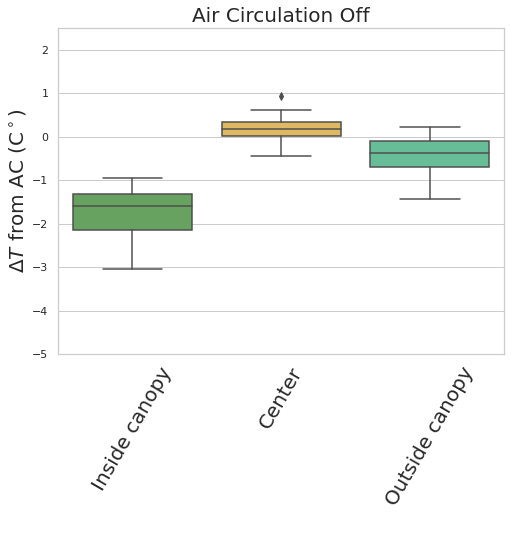

In [22]:

plt.subplots(1, figsize=(8,6))
a = sns.boxplot(x="variable", y="value", data=pd.melt(df_acoff_day))
a.set_ylabel("$\Delta{T}$ from AC (C$^\circ$)",fontsize=20)
a.set_xlabel(" ")
a.set_xticklabels(['Inside canopy', 'Center', 'Outside canopy'],fontsize=20)
a.set_title("Air Circulation Off",fontsize = 20 )
a.set_ylim(-5,2.5)
plt.xticks(rotation=60)
# save:
# plt.savefig(save_results_to + 'daytime_dist_no_outlayers.png')

### **Air circ On**

In [23]:
df_ac_on1 = df_clean.loc[:"2021-09-13 00:04:00"]
df_ac_on2 = df_clean.loc["2022-05-16 00:10:00":]
df_ac_on = pd.concat([df_ac_on1,df_ac_on2]) 
df_ac_on.plot()

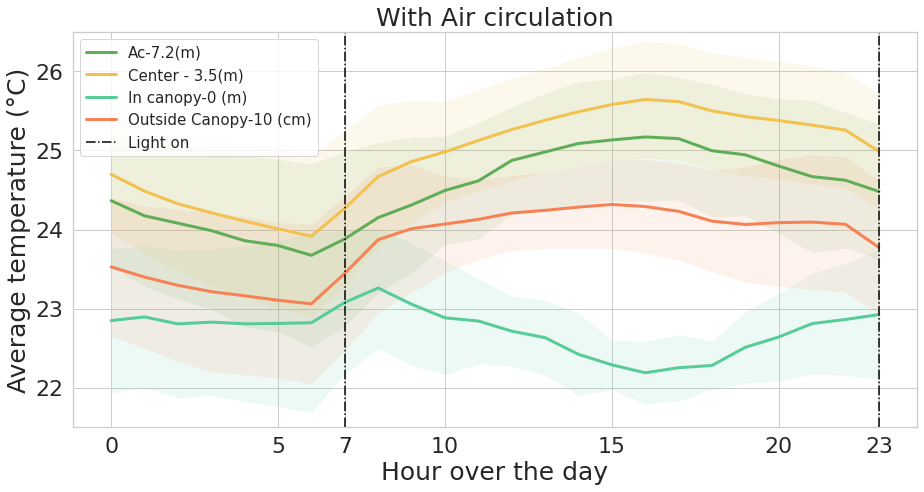

In [24]:
# resample the data into average hourly data
by_time = df_ac_on.groupby(df_ac_on.index.time).mean()
by_time_std = df_ac_on.groupby(df_ac_on.index.time).std()
time = np.arange(0,24,1)


# Graph
# palette =["#22577a", "#38a3a5", "#57cc99", "#80ed99", "#80ed99", "#c7f9cc","black"]
palette =["#5fad56", "#f2c14e", "#57cc99", "#f78154", "#226f54", "#b4436c","black"]
lw = 3
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(13,7))
# plots
ax.fill_between(time, by_time['1_ac_north'] + by_time_std['1_ac_north'], 
                by_time['1_ac_north']-by_time_std['1_ac_north'], alpha=.1)
ax.plot(time, by_time['1_ac_north'], label="Ac-7.2(m)",lw=lw)
ax.fill_between(time, by_time['Avg_center'] + by_time_std['Avg_center'],
                by_time['Avg_center']-by_time_std['Avg_center'], alpha=.1)
ax.plot(time,by_time['Avg_center'], label="Center - 3.5(m)",lw=lw)
ax.fill_between(time, by_time['5_greenwal_middle_incideCanopy'] + by_time_std['5_greenwal_middle_incideCanopy'],
                by_time['5_greenwal_middle_incideCanopy']-by_time_std['5_greenwal_middle_incideCanopy'], alpha=.1)
ax.plot(time,by_time['5_greenwal_middle_incideCanopy'], label="In canopy-0 (m)",lw=lw)
ax.fill_between(time, by_time['14_OutsideCanopyProfile_4'] + by_time_std['14_OutsideCanopyProfile_4'],
                by_time['14_OutsideCanopyProfile_4']-by_time_std['14_OutsideCanopyProfile_4'], alpha=.1)
ax.plot(time,by_time['14_OutsideCanopyProfile_4'], label="Outside Canopy-10 (cm)",lw=lw)


# vertical line:
plt.axvline(x = 7, color = 'black',ls='-.', label = 'Light on')
plt.axvline(x = 23, color = 'black',ls='-.', )
# axes labels and figure title
ax.set_xlabel('Hour over the day',fontsize = 25)
ax.set_ylabel('Average temperature (°C)',fontsize = 25)
ax.set_title('With Air circulation',fontsize = 25)
ax.set_ylim(21.5,26.5)

# some ticks adjustments
ax.set_xticks([0,5,7,10,15,20,23])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# legend
ax.legend(loc='upper left',fontsize = 15)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Profiles/" + 'No_AC_profile.png',bbox_inches = "tight")

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

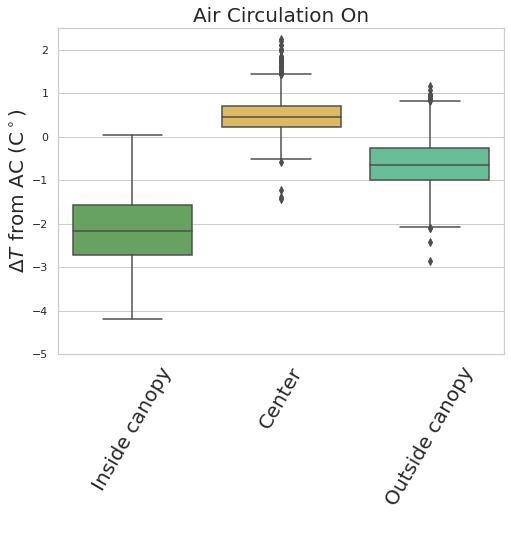

In [25]:
# create df of difference
df_acon_day = pd.DataFrame(index=df_ac_on.index)
for column in df_ac_on.columns:
  df_acon_day[column] = df_ac_on[column] - df_ac_on['1_ac_north']
df_acon_day.plot()

# JUst days
df_acon_day['day_night'] = df_acon_day.index.to_series().apply(f)

df_acon_day = df_acon_day[df_acon_day['day_night']=="Day"] # Keep only with days
# keep with relevant columns
df_acon_day = df_acon_day[[
       '5_greenwal_middle_incideCanopy', "Avg_center",
       '14_OutsideCanopyProfile_4']]
# df_acon_day.to_excel("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Profiles/ac_on_temp_horizontal_profile.xlsx")

# Graph
plt.subplots(1, figsize=(8,6))
a = sns.boxplot(x="variable", y="value", data=pd.melt(df_acon_day))
a.set_ylabel("$\Delta{T}$ from AC (C$^\circ$)",fontsize=20)
a.set_xlabel(" ")
a.set_xticklabels(['Inside canopy', 'Center', 'Outside canopy'],fontsize=20)
a.set_title("Air Circulation On",fontsize = 20 )
a.set_ylim(-5,2.5)
plt.xticks(rotation=60)
# save:
# plt.savefig(save_results_to + 'daytime_dist_no_outlayers.png')

## 1 graph:

1. create df of all the data again.

2. create column of Ac on/off.

3. Take the day time

4. Plot

In [26]:
# concat the data
df = pd.concat([df_ac_on1,df_ac_off,df_ac_on2])

# empty df to fill with dufferent
df_ac_all = pd.DataFrame(index=df.index)
for column in df.columns:
  df_ac_all[column] = df[column] - df['1_ac_north']

# JUst days
df_ac_all['day_night'] = df_ac_all.index.to_series().apply(f)

df_ac_all = df_ac_all[df_ac_all['day_night']=="Day"] # Keep only with days
# keep with relevant columns
df_ac_all = df_ac_all[[
       '5_greenwal_middle_incideCanopy', "Avg_center",
       '14_OutsideCanopyProfile_4']]

# df_ac_all.plot()

In [27]:
df_ac_all['Air_circ'] = 0
df_ac_all['Air_circ'].loc[:"2021-09-13 00:04:00"] = "On"
df_ac_all['Air_circ'].loc["2022-05-16 00:10:00":] = "On"
df_ac_all['Air_circ'].loc["2022-03-01 00:04:00":"2022-05-16 00:10:00"] = "Off"


df_ac_all.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,5_greenwal_middle_incideCanopy,Avg_center,14_OutsideCanopyProfile_4,Air_circ
Time,,,,
2021-09-01 07:00:00,NaN,0.275000,NaN,On
2021-09-01 08:00:00,NaN,0.276190,NaN,On
2021-09-01 09:00:00,NaN,0.291667,NaN,On
2021-09-01 10:00:00,NaN,0.370833,NaN,On
2021-09-01 11:00:00,NaN,0.300000,NaN,On


In [39]:
df_ac_all[df_ac_all.columns[:-1]].plot()
# len(df_ac_all.resample("D").mean().dropna())

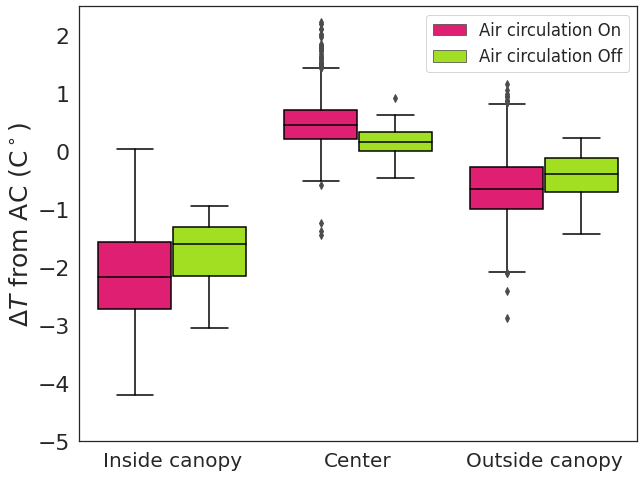

In [ ]:
# Graph
df_graph = pd.melt(df_ac_all, "Air_circ", var_name="a", value_name="c")
sns.set(style="white",font_scale=1.5)
palette = ["#ff006d","#adff02"]
plt.subplots(1, figsize=(10,8))
a = sns.boxplot(x="a", hue="Air_circ", y="c", data=df_graph,palette = palette)
# outline color:
# iterate over boxes
for i,box in enumerate(a.artists):
    box.set_edgecolor('black')
    # box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         a.lines[j].set_color('black')

a.set_ylabel("$\Delta{T}$ from AC (C$^\circ$)",fontsize=25)
a.set_xlabel(" ")
a.set_xticklabels(['Inside canopy', 'Center', 'Outside canopy'],fontsize=25)
# a.set_title("Air Circulation On",fontsize = 20 )
a.set_ylim(-5,2.5)
plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=22)

# legend:
handles, labels = a.get_legend_handles_labels()
a.legend(handles=handles, labels=["Air circulation On","Air circulation Off"])
# save:
# plt.savefig("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Profiles/" + 'boxplot_hue.png',bbox_inches = "tight")

Export to Excel

In [ ]:
# df_graph.to_excel("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Profiles/ac_temp_horizontal_profile.xlsx")

# RH

Same procces with RH

In [ ]:
df_add_rh = pd.read_csv("/content/drive/MyDrive/Greenwall/temperture_rh_data/RH/lab_rh-data-as-seriestocolumns-2022-07-04 15_58_51.csv")
df_add_rh['Time'] = pd.to_datetime(df_add_rh['Time'])
df_add_rh = df_add_rh.set_index('Time')
# df_add_rh

In [ ]:
# creat df for temperture:
file_path = '/content/drive/MyDrive/Greenwall/temperture_rh_data/RH/lab_rh-data-25052021_25052022.csv'
df_rh = pd.read_csv(file_path) # reading the raw date (xlsx)

# make 'Time' the dataframe index
df_rh['Time'] = pd.to_datetime(df_rh['Time'])
df_rh = df_rh.set_index('Time')
# df_rh = df_rh.fillna(method='ffill')  # Completion of the missing values according to the previous value
# df_rh = df_rh.interpolate()
df_all = pd.concat([df_rh,df_add_rh.loc[df_rh.index[-1]:]])
df_hourly_all_rh = df_all.resample('H').mean()
df_center = df_hourly_all_rh[['6_vaisala_calibration','4_lab_center','10_david_office_door']]
df_hourly_all_rh['Avg_center'] = df_center.mean(axis=1)
# iteractive plot for caculte Ca of Amax:
pd.options.plotting.backend = "plotly"

fig = df_hourly_all_rh.plot(title="$RH profile", template="simple_white")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Take the date of the AC was on by seasons

In [ ]:
# Winter
start_winter = "2022-01-20 00:00:00"
end_winter = '2022-02-28 00:00:00'
df_winter1 =df_hourly_all_rh.loc[start_winter:end_winter]
start_winter = "2022-01-04 00:00:00"
end_winter = '2022-01-15 00:00:00'
df_winter2 =df_hourly_all_rh.loc[start_winter:end_winter]
df_winter_rh = pd.concat([df_winter2,df_winter1])

# Autumn
start_autumn = "2021-09-01 00:00:00"
end_autumn = '2021-11-20 00:00:00'
end_autumn = '2021-09-30 00:00:00'
df_autumn_rh =df_hourly_all_rh.loc[start_autumn:end_autumn]

# Spring
start_spring = "2022-05-01 00:00:00"
end_spring = '2022-05-31 23:59:00'
df_spring_rh =df_hourly_all_rh.loc[start_spring:end_spring]

# Summer
start_summer = "2022-06-01 00:00:00"
end_summer = '2022-07-30 00:00:00'
df_summer_rh =df_hourly_all_rh.loc[start_summer:end_summer]

df_clean_rh = pd.concat([df_autumn_rh,df_winter_rh,df_spring_rh,df_summer_rh])

## Air circ Off

In [ ]:
rh_ac_off = df_clean_rh.loc["2022-03-01 00:04:00":"2022-05-16 00:10:00"]
# rh_ac_off.plot()

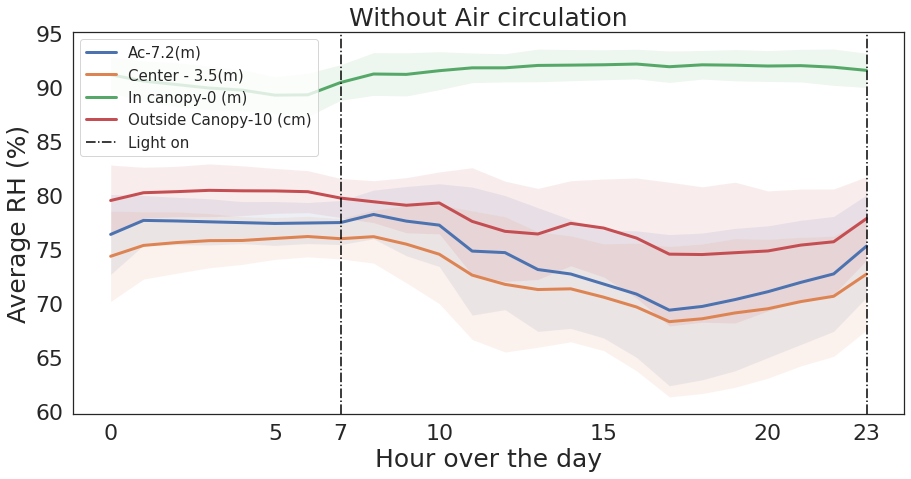

In [ ]:
# resample the data into average hourly data
by_time =rh_ac_off.groupby(rh_ac_off.index.time).mean()
by_time_std = rh_ac_off.groupby(rh_ac_off.index.time).std()
time = np.arange(0,24,1)


# Graph
# palette =["#22577a", "#38a3a5", "#57cc99", "#80ed99", "#80ed99", "#c7f9cc","black"]
palette =["#5fad56", "#f2c14e", "#57cc99", "#f78154", "#226f54", "#b4436c","black"]
lw = 3
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(13,7))
# plots
ax.fill_between(time, by_time['1_ac_north'] + by_time_std['1_ac_north'], 
                by_time['1_ac_north']-by_time_std['1_ac_north'], alpha=.1)
ax.plot(time, by_time['1_ac_north'], label="Ac-7.2(m)",lw=lw)
ax.fill_between(time, by_time['Avg_center'] + by_time_std['Avg_center'],
                by_time['Avg_center']-by_time_std['Avg_center'], alpha=.1)
ax.plot(time,by_time['Avg_center'], label="Center - 3.5(m)",lw=lw)
ax.fill_between(time, by_time['5_greenwall_middle_incideCanopy'] + by_time_std['5_greenwall_middle_incideCanopy'],
                by_time['5_greenwall_middle_incideCanopy']-by_time_std['5_greenwall_middle_incideCanopy'], alpha=.1)
ax.plot(time,by_time['5_greenwall_middle_incideCanopy'], label="In canopy-0 (m)",lw=lw)
ax.fill_between(time, by_time['14_OutsideCanopyProfile_4'] + by_time_std['14_OutsideCanopyProfile_4'],
                by_time['14_OutsideCanopyProfile_4']-by_time_std['14_OutsideCanopyProfile_4'], alpha=.1)
ax.plot(time,by_time['14_OutsideCanopyProfile_4'], label="Outside Canopy-10 (cm)",lw=lw)


# vertical line:
plt.axvline(x = 7, color = 'black',ls='-.', label = 'Light on')
plt.axvline(x = 23, color = 'black',ls='-.', )
# axes labels and figure title
ax.set_xlabel('Hour over the day',fontsize = 25)
ax.set_ylabel('Average RH (%)',fontsize = 25)
ax.set_title('Without Air circulation',fontsize = 25)
# ax.set_ylim(21.5,26.5)
# some ticks adjustments
ax.set_xticks([0,5,7,10,15,20,23])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# legend
ax.legend(loc='upper left',fontsize = 15)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Profiles/" + 'No_AC_RH_prfile.png',bbox_inches = "tight")

In [ ]:
df_difff = by_time[['1_ac_north','Avg_center','5_greenwall_middle_incideCanopy','14_OutsideCanopyProfile_4']]
(df_difff['Avg_center']-df_difff['5_greenwall_middle_incideCanopy']).min()

-23.55260942760944

## Air circ On

In [ ]:
df_ac_on1 = df_clean_rh.loc[:"2021-09-13 00:04:00"]
df_ac_on2 = df_clean_rh.loc["2022-05-16 00:10:00":]
rh_ac_on = pd.concat([df_ac_on1,df_ac_on2])

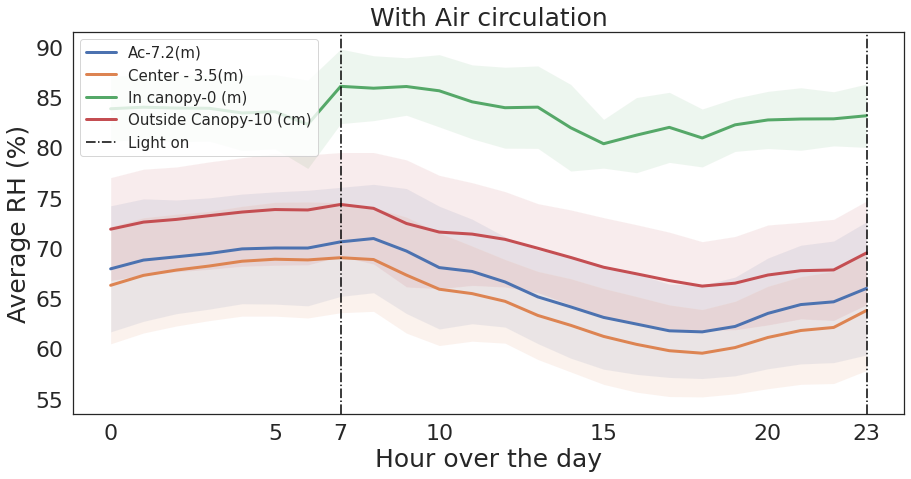

In [ ]:
# resample the data into average hourly data
by_time =rh_ac_on.groupby(rh_ac_on.index.time).mean()
by_time_std = rh_ac_on.groupby(rh_ac_on.index.time).std()
time = np.arange(0,24,1)


# Graph
# palette =["#22577a", "#38a3a5", "#57cc99", "#80ed99", "#80ed99", "#c7f9cc","black"]
palette =["#5fad56", "#f2c14e", "#57cc99", "#f78154", "#226f54", "#b4436c","black"]
lw = 3
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(13,7))
# plots
ax.fill_between(time, by_time['1_ac_north'] + by_time_std['1_ac_north'], 
                by_time['1_ac_north']-by_time_std['1_ac_north'], alpha=.1)
ax.plot(time, by_time['1_ac_north'], label="Ac-7.2(m)",lw=lw)
ax.fill_between(time, by_time['Avg_center'] + by_time_std['Avg_center'],
                by_time['Avg_center']-by_time_std['Avg_center'], alpha=.1)
ax.plot(time,by_time['Avg_center'], label="Center - 3.5(m)",lw=lw)
ax.fill_between(time, by_time['5_greenwall_middle_incideCanopy'] + by_time_std['5_greenwall_middle_incideCanopy'],
                by_time['5_greenwall_middle_incideCanopy']-by_time_std['5_greenwall_middle_incideCanopy'], alpha=.1)
ax.plot(time,by_time['5_greenwall_middle_incideCanopy'], label="In canopy-0 (m)",lw=lw)
ax.fill_between(time, by_time['14_OutsideCanopyProfile_4'] + by_time_std['14_OutsideCanopyProfile_4'],
                by_time['14_OutsideCanopyProfile_4']-by_time_std['14_OutsideCanopyProfile_4'], alpha=.1)
ax.plot(time,by_time['14_OutsideCanopyProfile_4'], label="Outside Canopy-10 (cm)",lw=lw)


# vertical line:
plt.axvline(x = 7, color = 'black',ls='-.', label = 'Light on')
plt.axvline(x = 23, color = 'black',ls='-.', )
# axes labels and figure title
ax.set_xlabel('Hour over the day',fontsize = 25)
ax.set_ylabel('Average RH (%)',fontsize = 25)
ax.set_title('With Air circulation',fontsize = 25)
# ax.set_ylim(21.5,26.5)
# some ticks adjustments
ax.set_xticks([0,5,7,10,15,20,23])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# legend
ax.legend(loc='upper left',fontsize = 15)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Profiles/" + 'yes_AC_RH_prfile.png',bbox_inches = "tight")

In [ ]:
df_difff = by_time[['1_ac_north','Avg_center','5_greenwall_middle_incideCanopy','14_OutsideCanopyProfile_4']]
(df_difff['Avg_center']-df_difff['5_greenwall_middle_incideCanopy']).min()

-22.219978779769136

## All togather plot

In [ ]:
# days data
def f(x):
    if (x.hour >= 7) and (x.hour <= 23):
        return 'Day'
    else:
        return'Night'

In [ ]:
# concat the data
df = pd.concat([df_ac_on1,rh_ac_off,df_ac_on2])

# empty df to fill with dufferent
rh_ac_all = pd.DataFrame(index=df.index)
for column in df.columns:
  rh_ac_all[column] = df[column] - df['1_ac_north']

# JUst days
# day/night column


rh_ac_all['day_night'] = rh_ac_all.index.to_series().apply(f)

rh_ac_all = rh_ac_all[rh_ac_all['day_night']=="Day"] # Keep only with days
# keep with relevant columns
rh_ac_all = rh_ac_all[[
       '5_greenwall_middle_incideCanopy', "Avg_center",
       '14_OutsideCanopyProfile_4']]

# rh_ac_all.plot()

In [ ]:
rh_ac_all['Air_circ'] = 0
rh_ac_all['Air_circ'].loc[:"2021-09-13 00:04:00"] = "On"
rh_ac_all['Air_circ'].loc["2022-05-16 00:10:00":] = "On"
rh_ac_all['Air_circ'].loc["2022-03-01 00:04:00":"2022-05-16 00:10:00"] = "Off"


# rh_ac_all.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



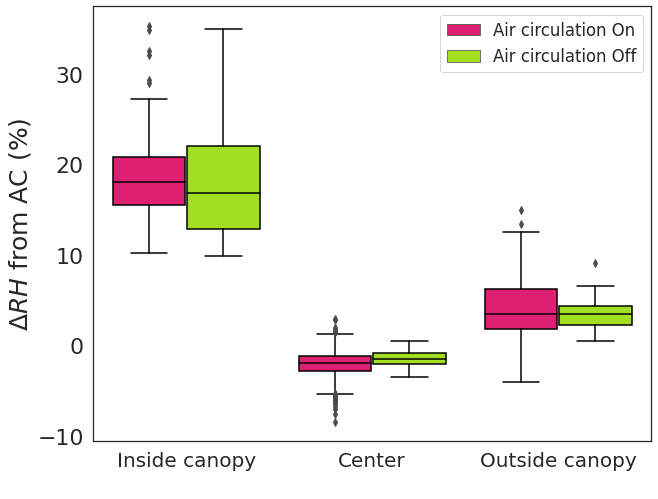

In [ ]:
# Graph
df_graph = pd.melt(rh_ac_all, "Air_circ", var_name="a", value_name="c")
sns.set(style="white", font_scale=1.5)
palette = ["#ff006d","#adff02"]
plt.subplots(1, figsize=(10,8))
a = sns.boxplot(x="a", hue="Air_circ", y="c", data=df_graph,palette = palette)
# outline color:
# iterate over boxes
for i,box in enumerate(a.artists):
    box.set_edgecolor('black')
    # box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         a.lines[j].set_color('black')

a.set_ylabel("$\Delta{RH}$ from AC (%)",fontsize=25)
a.set_xlabel(" ")
a.set_xticklabels(['Inside canopy', 'Center', 'Outside canopy'],fontsize=25)
# a.set_title("Air Circulation On",fontsize = 20 )
# a.set_ylim(-5,2.5)
plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=22)

# legend:
handles, labels = a.get_legend_handles_labels()
a.legend(handles=handles, labels=["Air circulation On","Air circulation Off"])
# save:
# plt.savefig("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Profiles/" + 'rh_boxplot_hue.png',bbox_inches = "tight")

In [ ]:
# df_graph.to_excel("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Profiles/ac_rh_horizontal_profile.xlsx")